# Group Assignment for Week6

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

<font size = 3 color = black face = "Times New Roman">First we want to generate the matrix A, we define a function to generate it.

In [23]:
def matrix_a(N):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i==j:
                A[i][j] = 2
            elif i == j - 1 or i == j + 1:
                A[i][j] = -1
    return A

<font size = 3 color = black face = "Times New Roman">(a) and (b)

<font size = 3 color = black face = "Times New Roman">Using $N = 5$ as an example, we first generate a solution generated by the normal distributed random numbers. Here we use the inner function $numpy.random.normal()$

In [24]:
N = 5
A = matrix_a(N)
x_a = np.random.normal(size = (N,1))
b = np.dot(A, x_a)

<font size = 3 color = black face = "Times New Roman">Then we define a funtion to realize the Jacobi method.

In [109]:
def jacobi(A, b, x_init, epsilon = 1e-10, max_iterations = 10000):
    D = np.diag(np.diag(A))
    LU = A - D
    x = x_init
    for i in range(max_iterations):
        D_inv = np.diag(1/np.diag(D))
        x_new = np.dot(D_inv, b - np.dot(LU, x))
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
    return x_new, i

In [26]:
x_init = np.zeros_like(b)  # generate a init vector x
x, iteration = jacobi(A, b, x_init)
print(x_a)
print(x)
print("iteration count:{}".format(iteration))

[[-0.80218713]
 [ 0.70233314]
 [-0.57502224]
 [-0.11887149]
 [ 0.43471781]]
[[-0.80218713]
 [ 0.70233314]
 [-0.57502224]
 [-0.11887149]
 [ 0.43471781]]
iteration count:163


<font size = 3 color = black face = "Times New Roman">Please pay attention that the iteration count is changed with the solution x_a, as we use a inner function to generate it, so everytime we run this program, the solution x_a and iteration count are different, but the iteration count difference is not huge.

<font size = 3 color = black face = "Times New Roman">Then let's explore the relation between $N$ and iteration count.

N: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39]
iteration count: [ 167.  225.  307.  354.  436.  580.  687.  796.  941. 1046. 1242. 1420.
 1555. 1722. 1731. 2171. 2202. 2571. 2598. 3018. 3207. 3419. 3823. 4113.
 4280. 4684. 5031. 5134. 5368. 5806. 6121. 6141. 6522. 7448. 7663.]


Text(0.5, 1.0, 'N-iteration count')

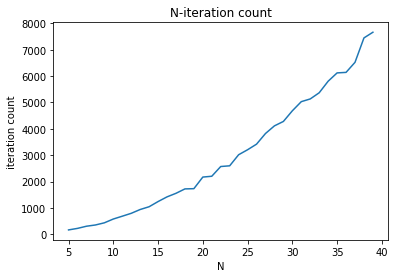

In [27]:
n_test = np.array([i for i in range(5, 40)])
iteration_test = np.zeros(len(n_test))
for n in n_test:
    A = matrix_a(n)
    x_a = np.random.normal(size = (n,1))
    b = np.dot(A, x_a)
    x_init = np.zeros_like(b)
    x, iteration = jacobi(A, b, x_init)
    iteration_test[n-5] = iteration
print("N:", n_test)
print("iteration count:",iteration_test)
plt.plot(n_test, iteration_test)
plt.xlabel('N')
plt.ylabel('iteration count')
plt.title('N-iteration count')

<font size = 3 color = black face = "Times New Roman">When $N$ is little, the line is like a linear function, but with $N$ icreasing, this image is more and more like a quadratic function.

<font size = 3 color = black face = "Times New Roman">(c)

<font size = 3 color = black face = "Times New Roman">Now we define a function to express weighted Jacobi method. Here we use $\omega$ $=$$ {2}\over{3}$.

In [28]:
def weighted_jacobi(A, b, x_init, epsilon = 1e-10, max_iterations = 10000):
    D = np.diag(np.diag(A))
    LU = A - D
    x = x_init
    for i in range(max_iterations):
        D_inv = np.diag(1/np.diag(D))
        x_new = x*(2/3) + (1/3)*np.dot(D_inv, b - np.dot(LU, x))
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
    return x_new, i 

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39]
[ 444.  569.  747.  873. 1189. 1298. 1605. 1814. 2097. 2566. 2694. 3089.
 3438. 3914. 3977. 4493. 5005. 5635. 5445. 6353. 6799. 7450. 7940. 8636.
 8876. 9349. 8718. 9999. 9999. 8796. 9999. 9999. 9999. 9999. 9999.]


Text(0.5, 1.0, 'N-iteration')

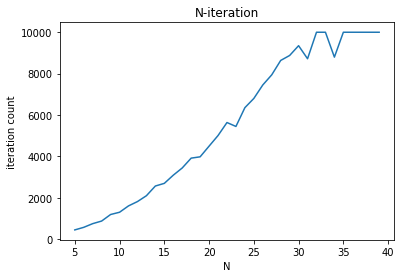

In [29]:
n_test = np.array([i for i in range(5, 40)])
print(n_test)
iteration_test = np.zeros(len(n_test))
for n in n_test:
    A = matrix_a(n)
    x_a = np.random.normal(size = (n,1))
    b = np.dot(A, x_a)
    x_init = np.zeros_like(b)
    x, iteration = weighted_jacobi(A, b, x_init)
    iteration_test[n-5] = iteration
print(iteration_test)
plt.plot(n_test, iteration_test)
plt.xlabel('N')
plt.ylabel('iteration count')
plt.title('N-iteration')

<font size = 3 color = black face = "Times New Roman">We can find that the iteration count is much bigger.

### Problem 2

#### Question a

<font size = 3 color = black face = "Times New Roman">First we want to generate the matrix A, we define a function to generate it

In [30]:
# Define the N rank second difference matrix.
def matrix_a(N):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i==j:
                A[i][j] = 2
            elif i == j - 1 or i == j + 1:
                A[i][j] = -1
    return A

In [31]:
# Define a function to do gauss_seidel method with epsilon is 1e-10
def gauss_seidel(A, b, x=None, max_iterations = 10000, epsilon = 1e-10):
    # Create an initial guess if needed                                                            
    if x is None:
        x = np.zeros_like(b)
  
    for it_count in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x_new, rtol=epsilon):
            break
        x = x_new
    return x, it_count

In [32]:
N = 5
A = matrix_a(N)
x_a = np.random.normal(size = (N,1))
b = np.dot(A, x_a)
x_init = np.zeros_like(b)
x, iteration = gauss_seidel(A, b, x_init)
print('True solution is\n',x_a)
print('Solution by using gauss_seidel method is\n',x)
print('The iteration is', iteration)

True solution is
 [[-0.45045935]
 [-1.14857298]
 [ 0.3370232 ]
 [ 0.67559208]
 [ 0.49887911]]
Solution by using gauss_seidel method is
 [[-0.45045937]
 [-1.14857301]
 [ 0.33702316]
 [ 0.67559206]
 [ 0.4988791 ]]
The iteration is 57


Text(0.5, 1.0, 'N-iteration')

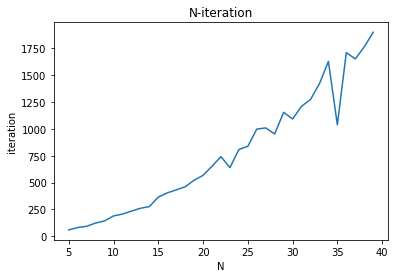

In [33]:
#Get n for test
n_test = np.array([i for i in range(5, 40)])
#Get iteration for the test n
iteration_test = np.zeros_like(n_test)
for n in n_test:
    A = matrix_a(n)
    x_a = np.random.normal(size = (n,1))
    b = np.dot(A, x_a)
    x_init = np.zeros_like(b)
    x, iteration = gauss_seidel(A, b, x_init)
    iteration_test[n-5] = iteration
plt.plot(n_test, iteration_test)
plt.xlabel('N')
plt.ylabel('iteration')
plt.title('N-iteration')

<font size = 3 color = black face = "Times New Roman"> Form the figure we are easy to know that when N is larger, the iteration is larger.

#### Question b

<font size = 3 color = black face = "Times New Roman">Obviously, Gauss-Seidel method converge, as expected, faster than the Jacobi method

### Problem 3

#### a) 
<font size = 3 color = black face = "Times New Roman"> In this problem, we're required to solve the following linear system with the SOR method.
$$
\begin{cases}
3x_1 - x_2+ x_3 = -1\\
-x_1 +3x_2 -x_3 = 7\\
x_1 - x_2 +3x_3 = -7\\
\end{cases}
$$

<font size = 3 color = black face = "Times New Roman"> First of all, let's rewrite the linear system in the matrix form and input related matrices. define 
$
A = \begin{pmatrix} 
3 & -1 & 1\\
-1 & 3 & -1\\
1 & -1 & 3\\
\end{pmatrix}
$, $
b = \begin{pmatrix} 
-1\\
7\\
-7\\
\end{pmatrix}
$
, then the system can be written as
$$
Ax = 
\begin{pmatrix} 
3 & -1 & 1\\
-1 & 3 & -1\\
1 & -1 & 3\\
\end{pmatrix}
\begin{pmatrix} 
x_1\\
x_2\\
x_3\\
\end{pmatrix}
= 
\begin{pmatrix} 
-1\\
7\\
-7\\
\end{pmatrix}
= b
$$

In [76]:
import numpy as np # Input matrices A and b
A = np.array([[3., -1., 1.],
              [-1., 3., -1.],
              [1., -1., 3.]])
b = np.array([-1., 7., -7.])

<font size = 3 color = black face = "Times New Roman"> After that, we define a function to use the SOR method to solve linear systems.

In [59]:
eps = 1e-10 # Set the accuracy (epsilon).

In [60]:
from numpy import array, zeros, zeros_like, dot, allclose
def SOR(A, b, omega, eps, N=200, x=None): 
# omega is the relaxation parameter,N is the maximum iteration number, x is the initial guess, eps is the accuracy.
    if x is None:
        x = zeros_like(b)
    for it_count in range(N): 
        x_new = zeros_like(x)
        for i in range(A.shape[0]):
            s1 = dot(A[i, :i], x_new[:i])
            s2 = dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (1. - omega) * x[i] + omega * (b[i] - s1- s2) / A[i, i] # SOR interation
        if np.linalg.norm(x-x_new, ord = 2) < eps:
            break
        x = x_new
    return it_count, x_new # Return both iteration and solution.

In [86]:
for omega in [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75]:
    counts, x = SOR(A, b, omega = omega, eps = eps, N = 200, x = [1., 1., 1.]) 
    # N = 200 so that every solution can fully converged
    print("omega={:<10}Iteration:{} solution:{}".format(omega, counts + 1, x)) 
    # The actual interation should be the counts above + 1, since iteration 0 should be included.  

omega=0.25      Iteration:117 solution:[ 1.  2. -2.]
omega=0.5       Iteration:52 solution:[ 1.  2. -2.]
omega=0.75      Iteration:29 solution:[ 1.  2. -2.]
omega=1         Iteration:17 solution:[ 1.  2. -2.]
omega=1.25      Iteration:24 solution:[ 1.  2. -2.]
omega=1.5       Iteration:43 solution:[ 1.  2. -2.]
omega=1.75      Iteration:102 solution:[ 1.  2. -2.]


<font size = 3 color = black face = "Times New Roman">Finally, we get the solution 
$$
\begin{cases}
x_1 = 1\\
x_2 = 2\\
x_3 = -2\\
\end{cases}
$$
#### b)
<font size = 3 color = black face = "Times New Roman">Firstly, we try to get the optimal empirically by plotting iteration as a function of  $\omega$

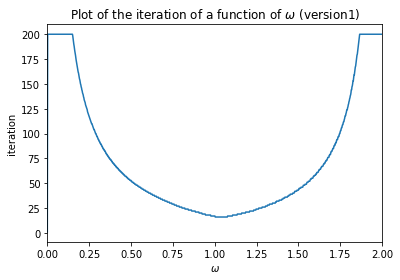

In [96]:
from matplotlib import pyplot as plt
x_init = [1, 1, 1] # Here we all choose [1,1,1] as the initial value.
omegas_plot = np.linspace(0, 2, 1000)
i = []
for omega in omegas_plot:
    count = SOR(A, b, omega = omega, eps = eps, N = 200, x = [1., 1., 1.])[0] # iteration = 200 is set to be the upper limit.
    i.append(count + 1)
plt.plot(omegas_plot, i)
plt.title(r'Plot of the iteration of a function of $\omega$ (version1)')
plt.xlabel(r'$\omega$')
plt.ylabel('iteration')
plt.xlim(0,2)
plt.show()

<font size = 3 color = black face = "Times New Roman"> After that, we reduce the range of omega to find the optimal one.

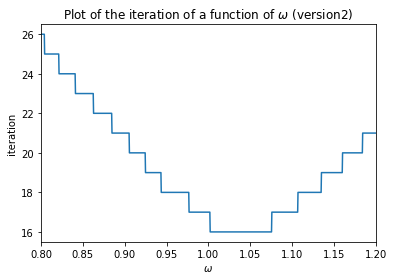

In [99]:
omegas_plot = np.linspace(0.8, 1.2, 1000)
i = []
for omega in omegas_plot:
    count = SOR(A, b, omega = omega, eps = eps, N = 200, x = [1., 1., 1.])[0] # iteration = 200 is set to be the upper limit.
    i.append(count + 1)
plt.plot(omegas_plot, i)
plt.title(r'Plot of the iteration of a function of $\omega$ (version2)')
plt.xlabel(r'$\omega$')
plt.ylabel('iteration')
plt.xlim(0.8, 1.2)
plt.show()

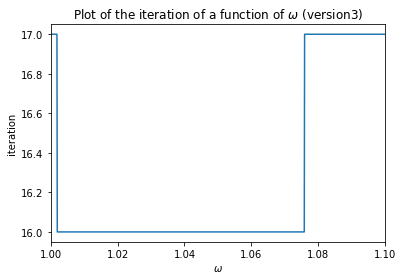

In [104]:
omegas_plot = np.linspace(1, 1.1, 1000)
i = []
for omega in omegas_plot:
    count = SOR(A, b, omega = omega, eps = eps, N = 200, x = [1., 1., 1.])[0] # iteration = 200 is set to be the upper limit.
    i.append(count + 1)
plt.plot(omegas_plot, i)
plt.title(r'Plot of the iteration of a function of $\omega$ (version3)')
plt.xlabel(r'$\omega$')
plt.ylabel('iteration')
plt.xlim(1,1.1)
plt.show()

<font size = 3 color = black face = "Times New Roman">The figure above shows the optimal omega range found by plotting.Then, let's use the formula below to calculate the theoretical prediction of the optimal relaxation parameter $\omega$
$$
\omega_\text{opt} = 1+\left(\frac{\lambda_J}{1+\sqrt{1-\lambda_J^2}}\right)^2 
$$
$\lambda_J$ is the spectral radius calculated  in the Jacobi method.  
Therefore, we should find $\lambda_J$ first, and here we introduce the power method.

In [9]:
# Calculation of the spectral radius.
def power(A, x0, epsilon = 1e-10):
    i = 0
    x1 = x0
    a0 = 0
    a1 = 1
    while abs(a1 - a0) > epsilon:
        x0 = x1
        x1 = np.dot(A, x0)
        a0 = a1
        a1 = np.dot(x0, x1)/np.dot(x0,x0)
        x1 = normalise(x1)
        i = i + 1
    return x1 ,i, a1


def normalise(x,eps=1e-10):
    N = np.sqrt(np.sum(abs(x)**2))
    if N < eps: # in case it is the zero vector!
        return x
    else:
        return x/N
    
D = np.diag(np.diag(A))
LU = A - D
D_inv = np.diag(1/np.diag(D))
J = -np.dot(D_inv, LU)
x = normalise(np.array([1, 1, 1]))

x1, i, lambda_1 = power(J, x) # abs(lambda_1) is the just the spectral radius.
abs(lambda_1)

0.6666666666375629

<font size = 3 color = black face = "Times New Roman"> Now we have $\lambda_J \approx 0.6666666666375629$

In [8]:
lamda_j = 0.6666666666375629
omega_op =1 + (lamda_j / (1 + (1 - lamda_j  ** 2)**0.5))**2 # Calculate the best op
omega_op

1.145898033733225

<font size = 3 color = black face = "Times New Roman"> Finally, we have theoretical $\omega_\text{opt} \approx 1.145898033733225$
    
<font size = 3 color = black face = "Times New Roman"> In conclusion, the theoretical optimal omega is not very consistent with the result from plotting. The possible reasons are listed as follows:

<font size = 3 color = black face = "Times New Roman"> 
1.The index for optimal omega may not only depend on the number of iteration but also on perhaps accuracy. For a problem with      simple coefficient, the only index is simplified to only iteration, which may cause this misamatch.

    
2.The iteration also relies on the initial value input, but the theoretical formula is general. Therefore, a mismatch occurs.

### Problem 4

<font size = 3 color = black face = "Times New Roman"> Once again, we're going to solve the Problem $Ax = b$, but using the conjugate gradient method. In this problem $A$ is shown below and $b$ is generated by the normal distributed random numbers. 
$$
A = \begin{pmatrix}
2 &-1  &  & &\\
-1 & 2 &-1  & \\
& -1 & 2 &-1  \\
& & -1  &2 &-1 \\
& & & -1 & 2
\end{pmatrix}
$$

<font size = 3 color = black face = "Times New Roman"> First of all, let's input $A$ and generate $b$. Sinc  $A$ is already a positive symmetric matrix, we don't need to addtional operations.

In [114]:
def matrix_A(N):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i==j:
                A[i][j] = 2
            elif i == j - 1 or i == j + 1:
                A[i][j] = -1
    return A
A = matrix_A(5) # Create the matrix A
b = np.random.normal(size = (5)) # Create b with the normal distributed random numbers.
print(b)

[ 0.31630357 -0.31865896 -1.2313885   1.44070643  0.93666846]


<font size = 3 color = black face = "Times New Roman"> Then we define a function to solve problems with conjugate gradient method.

In [128]:
def conjugate_grad(A, b, N =100, x=None): # Set N = 100 the maximum iteration.
    n = len(b)
    if not x:
        x = np.ones(n)
    r = b - np.dot(A, x)
    p = r
    r_k_norm = np.dot(r, r)
    for i in range(N): 
        Ap = np.dot(A, p)
        alpha = r_k_norm / np.dot(p, Ap)
        x += alpha * p
        r -= alpha * Ap
        r_kplus1_norm = np.dot(r, r)
        beta = r_kplus1_norm / r_k_norm
        r_k_norm = r_kplus1_norm
        if r_kplus1_norm < 1e-16:
            print('Iteration:{}'.format(i)) # Output the times of iteration.
            break
        p = r + beta * p
    return x

In [129]:
print("Matrix b:{}\n".format(b))
print("Solution x_conjugate_grad:{}".format(conjugate_grad(A, b, N=100, x=None))) # Conjugate gradient method.

Matrix b:[ 0.31630357 -0.31865896 -1.2313885   1.44070643  0.93666846]

Iteration:31
Solution x_conjugate_grad:[ 0.07179964 -0.17270429 -0.09854927  1.20699426  1.07183136]


<font size = 3 color = black face = "Times New Roman"> From the results above, we can find the solution x for a random b. Then we use Jacobi's method and Cholesky method to solve the equation with same b again, and compare their results with this one.

In [118]:
x_init = np.zeros_like(b.T)
jacobi(A, b.T, x_init) # Jacobi's method from Problem1.

(array([ 0.07179964, -0.1727043 , -0.09854927,  1.20699426,  1.07183136]), 155)

In [119]:
import scipy.linalg # Cholesky method
L = np.linalg.cholesky(A)
y = scipy.linalg.solve(L, b)
x = scipy.linalg.solve(L.T, y)
print("Solution x_Cholesky:{}".format(x)) 

Solution x_Cholesky:[ 0.07179964 -0.1727043  -0.09854927  1.20699426  1.07183136]


<font size = 3 color = black face = "Times New Roman"> From the results above, we can find the solutions from the three methods are almost the same, but as for the conjugate gradient, the iteration required is much less than the Jacobi's method. But it seems that an additional higer requirement for accuracy of conjugate gradient method should be added. 

### Problem 5

In [18]:
def normalise(x,eps=1e-10):
    N = np.sqrt(np.sum(abs(x)**2))
    if N < eps: # in case it is the zero vector!
        return x
    else:
        return x/N
    

def power(A, x0, epsilon = 1e-10):
    i = 0
    x1 = x0
    a0 = 0
    a1 = 1
    while abs(a1 - a0) > epsilon:
        x0 = x1
        x1 = np.dot(A, x0)
        a0 = a1
        a1 = np.dot(x0, x1)/np.dot(x0,x0)
        x1 = normalise(x1)
        i = i + 1
    return x1 ,i, a1

<font size = 3 color = black face = "Times New Roman">(a)

In [19]:
A = np.array([[4, -1j, 2],
            [1j, 2, 2+7j],
            [2, 2-7j, -2]])
x = normalise(np.array([1, 1, 1]))
x, iteration, a = power(A, x)
print("Dominant eigenvector:",x)
print("Dominant eigenvalue: {:.5f}".format(a))
print("iteration count:{}".format(iteration))

Dominant eigenvector: [0.33980972-0.23445694j 0.49134277+0.51067228j 0.50105938-0.27621534j]
Dominant eigenvalue: 8.45188+0.00000j
iteration count:273


<font size = 3 color = black face = "Times New Roman">(b)

In [21]:
x0 = normalise(np.array([1, 1, 1]))
x1 = np.dot(A,x0)
i = 0
while np.linalg.norm(x1 - x0) > 1e-10 and i < 500:
    x0 = x1
    x1 = normalise(np.dot(A, x0))
    i = i + 1
i

230

<font size = 3 color = black face = "Times New Roman">Obvious this method can decrease run time.

### Problem 6

<font size = 3 color = black face = "Times New Roman"> Firstly, enter the matrix we're going to deal with.

In [152]:
A = np.array([[4, -1j, 2], [1j, 2, 2 + 7j], [2, 2 - 7j, -2]])
eps = 1e-8 # Set the accuracy.

<font size = 3 color = black face = "Times New Roman"> Then define a function to find the minimum eigenvalue.

In [155]:
import numpy as np
def rayleigh_quotient(A,x): # Calculate the rayleigh quotient.
    return np.dot(x, np.dot(A, x))/np.dot(x,x)

def minimum_eigen_finder(A, eps, N = 25, x = None): # Define a function to find the minimum eigenvalue.
    if not x:
        x = normalise(np.array([1, 1, 1]))
    else:
        x = normalise(np.array(x)) # Step1: Choose a normalised vector x0   
    for i in range(N):    
        x_new = np.linalg.solve(A,x) # Step2: Get the next x
        x_new = normalise(x_new)
        if np.linalg.norm(x_new - x, ord=2) < eps: # Judge whether x is convergent.
            break
        x = x_new
    mini_eigen = rayleigh_quotient(A,x) # Get the minimum eigenvalue from the rayleigh quotient.
    return mini_eigen

In [157]:
mini_eigen = minimum_eigen_finder(A, eps = eps, N = 25, x = None)
mini_eigen

(3.1896027772323547-2.9426682307850324e-09j)

<font size = 3 color = black face = "Times New Roman"> Finally, we get the minimum eigenvalue $\lambda_{mini} = 3.1896027772323547-2.9426682307850324 \times 10^{-9}i$.